# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception:
        print(f"City not found. Skipping...")
        pass

    # pause to avoid rate limiting
        time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | moapa valley
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | uige
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | yuzhno-kurilsk
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | espargos
City not found. Skipping...
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | yakutsk
Processing Record 21 of Set 1 |

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,9.06,97,0,0.45,ZA,1722657951
1,bethel,41.3712,-73.4140,24.83,90,100,1.54,US,1722657952
2,adamstown,-25.0660,-130.1015,20.31,78,8,4.22,PN,1722657952
3,anadyr,64.7500,177.4833,10.28,93,100,6.00,RU,1722657952
4,carnarvon,-24.8667,113.6333,20.51,55,0,6.46,AU,1722657952


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,9.06,97,0,0.45,ZA,1722657951
1,bethel,41.3712,-73.4140,24.83,90,100,1.54,US,1722657952
2,adamstown,-25.0660,-130.1015,20.31,78,8,4.22,PN,1722657952
3,anadyr,64.7500,177.4833,10.28,93,100,6.00,RU,1722657952
4,carnarvon,-24.8667,113.6333,20.51,55,0,6.46,AU,1722657952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

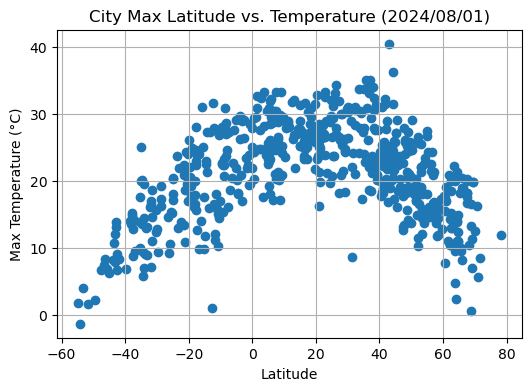

In [63]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
temperatures = city_data_df["Max Temp"]
plt.figure(figsize=(6, 4))
plt.scatter(latitudes, temperatures)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024/08/01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

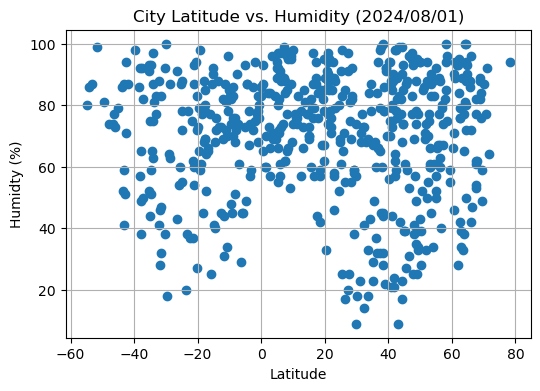

In [65]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.figure(figsize=(6, 4))
plt.scatter(latitudes, humidity)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024/08/01)')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

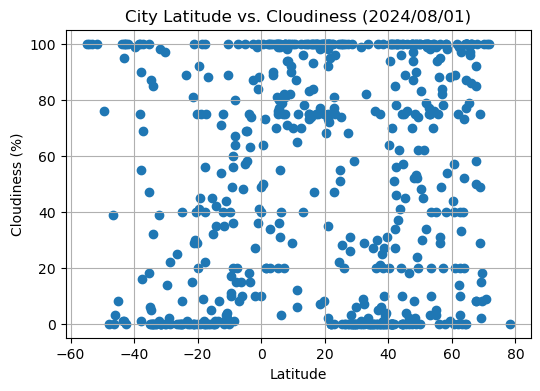

In [67]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.figure(figsize=(6, 4))
plt.scatter(latitudes, cloudiness)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024/08/01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

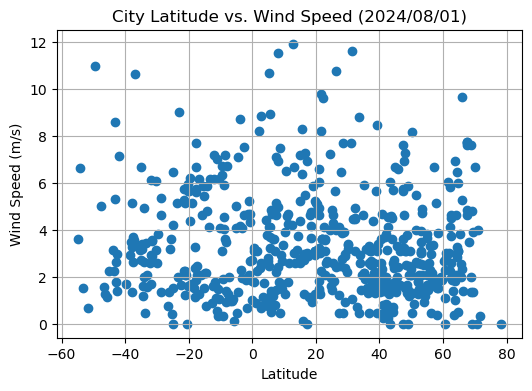

In [69]:
# Build the scatter plots for latitude vs. wind speed
latitudes = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.figure(figsize=(6, 4))
plt.scatter(latitudes, wind_speed)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024/08/01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,24.83,90,100,1.54,US,1722657952
3,anadyr,64.7500,177.4833,10.28,93,100,6.00,RU,1722657952
5,moapa valley,36.5805,-114.4703,34.22,32,30,3.14,US,1722657952
6,olonkinbyen,70.9221,-8.7187,5.62,92,100,4.00,SJ,1722657953
8,yellowknife,62.4560,-114.3525,15.31,76,20,4.63,CA,1722657861


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,9.06,97,0,0.45,ZA,1722657951
2,adamstown,-25.0660,-130.1015,20.31,78,8,4.22,PN,1722657952
4,carnarvon,-24.8667,113.6333,20.51,55,0,6.46,AU,1722657952
7,uige,-7.6087,15.0613,16.17,90,20,1.28,AO,1722657953
10,port-aux-francais,-49.3500,70.2167,2.25,81,76,10.99,TF,1722657953


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6332398549882452


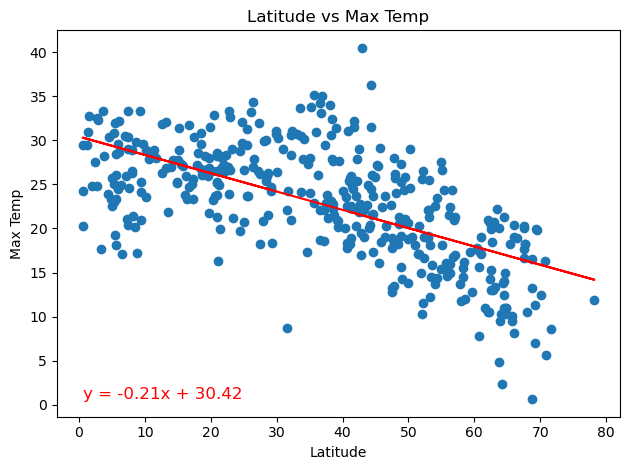

In [25]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.tight_layout()
plt.show()

The r-value is: 0.7206455196289768


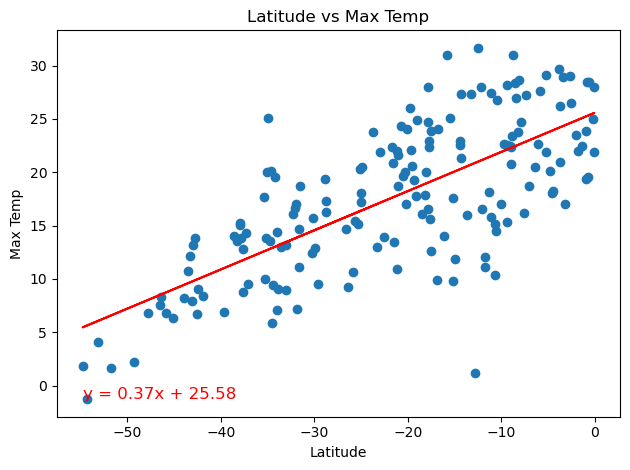

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.tight_layout()
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10230171988069925


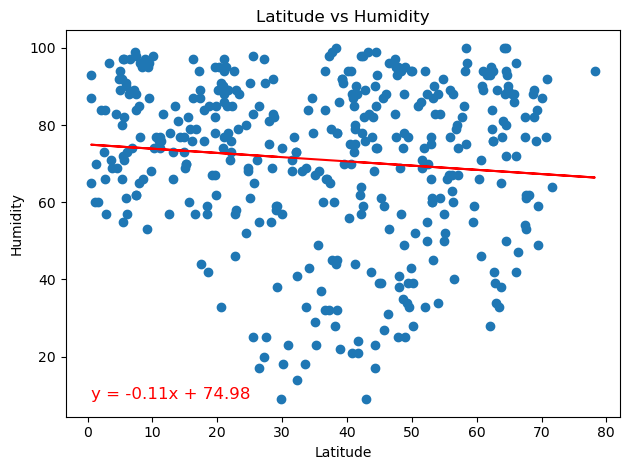

In [29]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
# Additional plot titles
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.show()

The r-value is: -0.016919121548908535


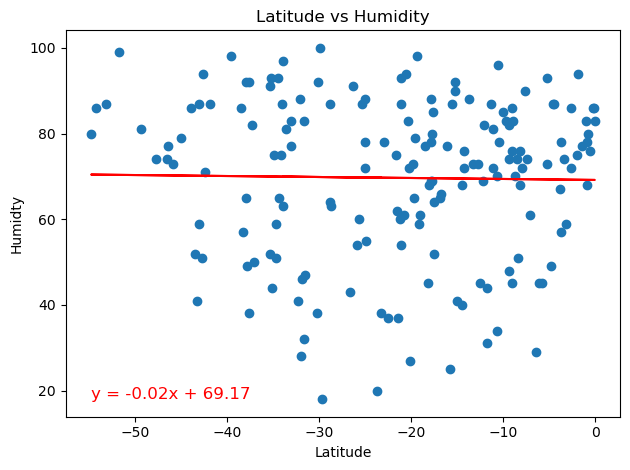

In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
# Additional plot titles
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** The linear relationship for both Northern and Southern hemisphere show a negative correlation and weak strength, suggesting that the realtionship between humidity and latitude show very little relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.14181655293606377


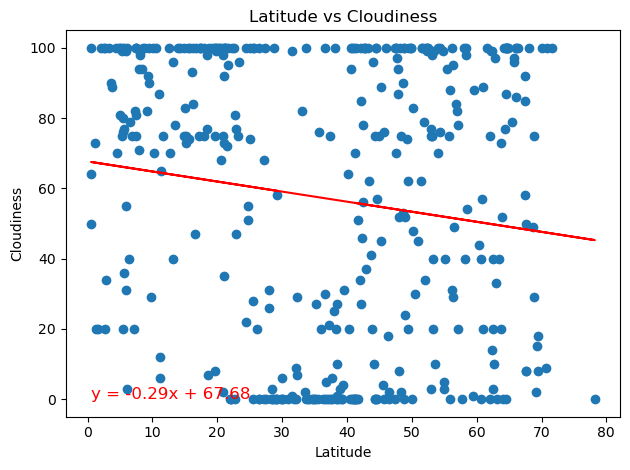

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
# Additional plot titles
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.show()

The r-value is: -0.038403558904693685


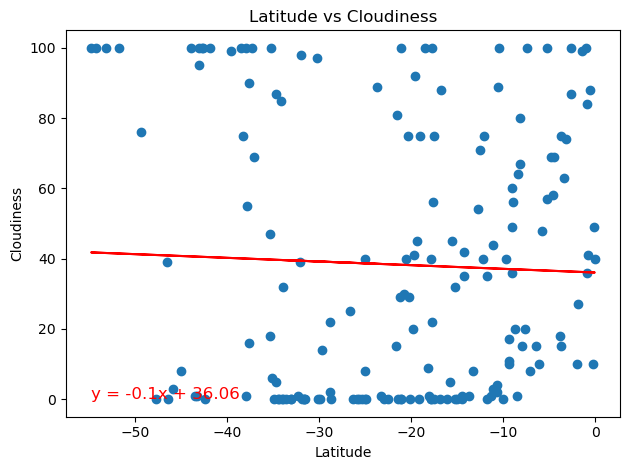

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
# Additional plot titles
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** This correlation between latitude and cloudiness is very similiar to the humidity and latitude correlation. Northern tends to have 60% cloud coverage and Southern tend to have 40% cloud coverage.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12178453217224677


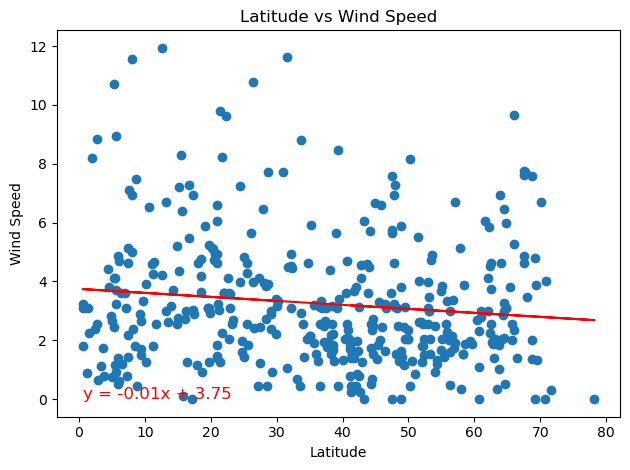

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
# Additional plot titles
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.show()

The r-value is: -0.0215137253759108


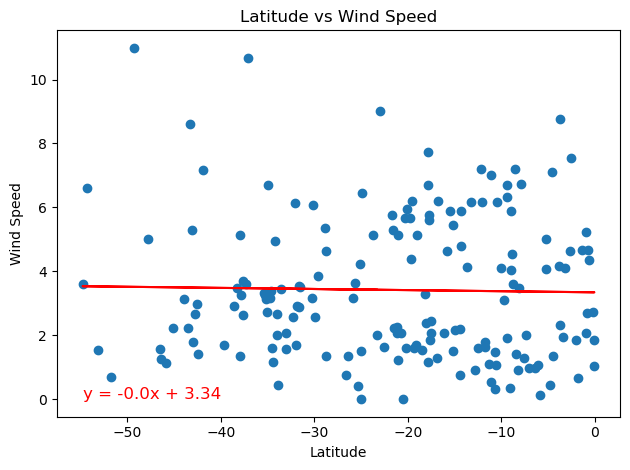

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
# Additional plot titles
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** With wind speed versus latitude there is also very little correlation when compared to the Northern and Southern hemisphere.